<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a><span class="toc-item-num">1  </span>Data pre-processing</a></span><ul class="toc-item"><li><span><a><span class="toc-item-num">1.1  </span>Import data</a></span></li><li><span><a><span class="toc-item-num">1.2  </span>Group indicators into risk factors</a></span></li><li><span><a><span class="toc-item-num">1.3  </span>Explore Indicator availability over the years</a></span></li><li><span><a><span class="toc-item-num">1.4  </span>Explore data disagregation</a></span><ul class="toc-item"><li><span><a><span class="toc-item-num">1.4.1  </span>NCD Risk Factor</a></span></li><li><span><a><span class="toc-item-num">1.4.2  </span>Metabolic &amp; Behavioral Risk Factors</a></span></li><li><span><a><span class="toc-item-num">1.4.3  </span>Other Risk Factor</a></span></li></ul></li><li><span><a><span class="toc-item-num">1.5  </span>Change rates to number [work in progress]</a></span></li><li><span><a><span class="toc-item-num">1.6  </span>Explore correlations of indicators of risk factors</a></span><ul class="toc-item"><li><span><a><span class="toc-item-num">1.6.1  </span>Metabolic Risk Factor</a></span></li><li><span><a><span class="toc-item-num">1.6.2  </span>Behavorial Risk Factor</a></span></li><li><span><a><span class="toc-item-num">1.6.3  </span>NCD Risk Factor</a></span></li></ul></li><li><span><a><span class="toc-item-num">1.7  </span>Explore Missing countries and data points</a></span></li></ul></li><li><span><a><span class="toc-item-num">2  </span>Assigning Risk Factor Scores using Percentage Binning</a></span><ul class="toc-item"><li><span><a><span class="toc-item-num">2.1  </span>NCD Risk Factor</a></span></li><li><span><a><span class="toc-item-num">2.2  </span>Metabolic Risk Factor</a></span></li><li><span><a><span class="toc-item-num">2.3  </span>Behavioral Risk Factor</a></span></li></ul></li></ul></div>

## Data pre-processing

### Import data

In [2]:
import pandas as pd
df = pd.read_csv('covid19- merged risk factors-v2-06May20.csv')

In [3]:
print('There are {} rows in the imported dataset.'.format(df.shape[0]))

There are 23512 rows in the imported dataset.


In [4]:
print('There are {} unique indicators in the imported dataset in total.'.format(df['Indicator'].nunique()))

There are 44 unique indicators in the imported dataset in total.


In [5]:
print('colums imported and their datatypes')
df.dtypes

colums imported and their datatypes


Country            object
Year                int64
Indicator          object
Disaggregation     object
Data              float64
Source             object
dtype: object

In [6]:
df.head()

,Country,Year,Indicator,Disaggregation,Data,Source
0,Albania,2013,"Daily tobacco smoking, age-standardised",Both sexes,23.8,WHO GHO. https://apps.who.int/gho/data/node.ma...
1,Albania,2013,"Daily tobacco smoking, age-standardised",Male,41.7,WHO GHO. https://apps.who.int/gho/data/node.ma...
2,Albania,2013,"Daily tobacco smoking, age-standardised",Female,6.2,WHO GHO. https://apps.who.int/gho/data/node.ma...
3,Albania,2013,"Daily cigarette smoking, age-standardised",Both sexes,21.3,WHO GHO. https://apps.who.int/gho/data/node.ma...
4,Albania,2013,"Daily cigarette smoking, age-standardised",Male,38.4,WHO GHO. https://apps.who.int/gho/data/node.ma...


### Group indicators into risk factors

In [7]:
groups=[]
for i in df['Indicator']:
    if i in ('Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized',
             'Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)',
             'Current cigarette smoking, age-standardised',
             'Current tobacco smoking, age-standardised',
             'Daily cigarette smoking, age-standardised',
             'Daily tobacco smoking, age-standardised'):
        groups.append('Behavioral Risk Factor')
    elif i in ('Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years',
               'Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years',
               'Stunting - height-for-age (<-2SD)',
               'Interstitial lung disease and pulmonary sarcoidosis prevalence rate',
               'Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)',
               'Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)'):
        groups.append('Metabolic Risk Factor')
    elif i in ('Chronic obstructive pulmonary disease prevalence rate',
               'Chronic respiratory diseases prevalence rate',
               'Asthma prevalence rate',
               'Other chronic respiratory diseases prevalence rate',
               'Pneumoconiosis prevalence rate',
               'Estimated number of new cases, all cancers, all ages (crude-estimate)',
               'Diabetes prevalence',
               'Cancer prevalence',
               'Cardiovascular diseases prevalence'):
        groups.append('NCD Prevalence Rate')
    elif i in ('Concentrations of fine particulate matter (PM2.5)',
               'Total population by five-year age group (thousands)'):
        groups.append('Other')
    else:
        groups.append('')
        
df['Risk Factor']=groups

In [8]:
df_other = df[(df['Risk Factor'] != 'NCD Prevalence Rate') 
   & (df['Risk Factor'] != 'Metabolic Risk Factor') 
   & (df['Risk Factor'] != 'Behavioral Risk Factor')
 & (df['Risk Factor'] != 'Other')]
df_other['Risk Factor'].unique()

array([''], dtype=object)

In [9]:
print('Drop the following indicators that are not to be included in any risk factor analysis:')
dropi = df[df['Risk Factor'] ==''].index
df.iloc[dropi,:]['Indicator'].unique()

Drop the following indicators that are not to be included in any risk factor analysis:


array(['HIV/AIDS prevalence rate ',
       'HIV/AIDS - drug-susceptible tuberculosis prevalence',
       'HIV/AIDS prevalence rate',
       'Drug-susceptible tuberculosis prevalence rate',
       'Tuberculosis prevalence rate',
       'Multidrug-resistant tuberculosis without extensive drug resistance prevalence rate',
       'Extensively drug-resistant tuberculosis prevalence rate',
       'Out-of-pocket (OOPS) as % of Current Health Expenditure (CHE)',
       'Female population by five-year age group (thousands)',
       'Male population by five-year age group (thousands)',
       'Age-standardized suicide rates (per 100 000 population)',
       'Total density per 100 000 population: Hospitals',
       'Medical doctors (per 10 000 population)',
       'Nursing and midwifery personnel (per 10 000 population)',
       'Bipolar disorder prevalence rate',
       'Anxiety disorders prevalence rate',
       'Eating disorders prevalence rate',
       'Schizophrenia prevalence rate',
       

In [10]:
df.drop(dropi, inplace=True)

In [11]:
print('The dataset is reduced to {} rows.'.format(df.shape[0]))

The dataset is reduced to 11061 rows.


### Explore Indicator availability over the years 

In [12]:
print('The dataset has data in total {} unique countries.'.format( df['Country'].nunique() ))

The dataset has data in total 220 unique countries.


In [13]:
print('This is how the indicators data points per country are broken down: ')
df.groupby(['Risk Factor','Indicator','Year'])['Country'].nunique()

This is how the indicators data points per country are broken down: 


Risk Factor             Indicator                                                                                   Year
Behavioral Risk Factor  Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized                   2016    188
                        Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)                  2011      2
                                                                                                                    2013     10
                                                                                                                    2014      1
                                                                                                                    2015     83
                                                                                                                    2016     93
                        Current cigarette smoking, age-standardised                                            

In [14]:
#unique number of countries in every year
print('The unquie number of countries that we have some data point for per year is as below: ')
df.groupby('Year')['Country'].nunique()

The unquie number of countries that we have some data point for per year is as below: 


Year
1985      1
1994      1
1995      3
2000      3
2001      1
2002      1
2004      3
2005      1
2007      5
2008      2
2009      6
2010      8
2011      6
2012     13
2013    137
2014    192
2015    190
2016    193
2017    194
2018    184
2019      6
2020    200
Name: Country, dtype: int64

In [15]:
print('For 2017')
df[df['Year']==2017].groupby(['Risk Factor','Indicator', 'Year'])['Country'].nunique()

For 2017


Risk Factor            Indicator                                                            Year
Metabolic Risk Factor  Interstitial lung disease and pulmonary sarcoidosis prevalence rate  2017    194
                       Stunting - height-for-age (<-2SD)                                    2017     14
NCD Prevalence Rate    Asthma prevalence rate                                               2017    194
                       Chronic obstructive pulmonary disease prevalence rate                2017    194
                       Chronic respiratory diseases prevalence rate                         2017    194
                       Other chronic respiratory diseases prevalence rate                   2017     17
                       Pneumoconiosis prevalence rate                                       2017    194
Name: Country, dtype: int64

In [16]:
#'Drop stunting factor due to lack of data points
dropi = df[df['Indicator'] =='Stunting - height-for-age (<-2SD)'].index
df.iloc[dropi,:]['Indicator'].unique()
df.drop(dropi,inplace=True)

### Explore data disagregation

In [17]:
print('Numer of disaggregation category per indicator')
df.groupby(['Indicator'])['Disaggregation'].nunique()

Numer of disaggregation category per indicator


Indicator
Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized                      3
Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)                     1
Asthma prevalence rate                                                                         1
Chronic obstructive pulmonary disease prevalence rate                                          1
Chronic respiratory diseases prevalence rate                                                   1
Concentrations of fine particulate matter (PM2.5)                                              3
Current cigarette smoking, age-standardised                                                    3
Current tobacco smoking, age-standardised                                                      3
Daily cigarette smoking, age-standardised                                                      3
Daily tobacco smoking, age-standardised                                                        3
Estimated number of 

#### NCD Risk Factor

In [18]:
#this is only aggregated so good to go
print ('NCD Risk Factor is only aggregated by {}'.format(df[(df['Risk Factor']=='NCD Prevalence Rate')]['Disaggregation'].unique()))

NCD Risk Factor is only aggregated by [nan 'Both sexes']


#### Metabolic &amp; Behavioral Risk Factors

For metabolic and behavioral risk factors, we keep 'Both sexes' aggregation and drop the rest.

In [19]:
dropi =  df[(df['Risk Factor']=='Metabolic Risk Factor')
                &(df['Indicator'].isin(['Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized', #both sexes
                                 
                                   'Current cigarette smoking, age-standardised',#both sexes
                                   'Current tobacco smoking, age-standardised',#both sexes
                                   'Daily cigarette smoking, age-standardised',#both sexes
                                   'Daily tobacco smoking, age-standardised',#both sexes
                                   'Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)',#both sexes
                                   'Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)',#both sexes
                                   'Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years',#both sexes
                                   'Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years']#both sexes
                                 )) 
           & (df['Disaggregation']!='Both sexes')].index

df.iloc[dropi,:]['Disaggregation'].unique()
df.drop(dropi,inplace = True)

#### Other Risk Factor

In [20]:
##how to handle this disaggregation
df[df['Indicator']=='Total population by five-year age group (thousands)']['Disaggregation'].unique()
#  'Concentrations of fine particulate matter (PM2.5)',#total

array(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80-84', '85-89', '90-94', '95-99', '100+'], dtype=object)

### Change rates to number [work in progress]

In [21]:
#https://data.worldbank.org/indicator/SP.POP.TOTL
pop = pd.read_csv('population.csv')
pop.drop([0,1,2],inplace=True)

#pop.iloc[0,4:62]  = pop.iloc[0,4:62].round(0)
pop.rename(columns=pop.iloc[0],inplace=True)
pop.drop([3],inplace=True)

pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,nan
4,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN,NaN
5,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN,NaN
6,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN,NaN
7,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN,NaN
8,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN,NaN


In [22]:
c= pd.DataFrame(pop['Country Name'].unique(),columns=['Country']) #264

In [23]:
d= pd.DataFrame( df['Country'].unique(),columns=['Country']) #220

In [24]:
#d[~d['Country'].isin(c['Country'])]

### Explore correlations of indicators of risk factors

#### Metabolic Risk Factor

In [25]:
df_meta = df[(df['Risk Factor']=='Metabolic Risk Factor') &
            df['Indicator'].isin (['Interstitial lung disease and pulmonary sarcoidosis prevalence rate' ,                     
                        'Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)'  ,
                        'Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)' ,          
                        'Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years' ,                  
                        'Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years'])
            & (df['Disaggregation']=='Both sexes')]

#df_meta.head()

In [26]:
df_meta[(df_meta['Indicator']=='Interstitial lung disease and pulmonary sarcoidosis prevalence rate')& (df_meta['Country']=='Congo')]

df_meta.drop([6949],inplace=True)
df_meta[(df_meta['Indicator']=='Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years')& (df_meta['Country']=='Congo')]
df_meta.drop([2198],inplace=True)
df_meta[(df_meta['Indicator']=='Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)')& (df_meta['Country']=='Congo')]
df_meta.drop([3944],inplace=True)
df_meta[(df_meta['Indicator']== 'Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)')& (df_meta['Country']=='Congo')]
df_meta.drop([3344],inplace=True)

df_meta[(df_meta['Indicator']== 'Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years' )& (df_meta['Country']=='Congo')]
df_meta.drop([2798],inplace=True)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWit

In [27]:
df_metarisk=pd.DataFrame()
irange = df_meta['Indicator'].unique()
df_meta.sort_values(['Indicator', 'Country'], ascending=True, inplace = True)

for i in irange:
    #print(i)
    pivot = df_meta[df_meta['Indicator']==i].pivot(index='Country', columns='Indicator', values='Data')
    pivot.reset_index(inplace=True)
    pivot.columns =['Country', i]
    df_metarisk['Country']=pivot['Country']
    df_metarisk [i] = pivot[i]
    


#df_metarisk.head()

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [28]:
import matplotlib.pyplot as pl
import seaborn as sns
import numpy as np
x = df_metarisk.iloc[:,1:5]
corr = x.corr()
print(corr.style.background_gradient(cmap='coolwarm').set_precision(2))

f, ax = pl.subplots(figsize=(8, 6))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [29]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,"Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+ years","Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+ years","Prevalence of overweight among adults, BMI ≥ 25 (crude estimate) (%)","Prevalence of obesity among adults, BMI ≥ 30 (age-standardized estimate) (%)"
"Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+ years",1,0.02,0.67,0.82
"Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+ years",0.02,1,0.14,-0.033
"Prevalence of overweight among adults, BMI ≥ 25 (crude estimate) (%)",0.67,0.14,1,0.92
"Prevalence of obesity among adults, BMI ≥ 30 (age-standardized estimate) (%)",0.82,-0.033,0.92,1


#### Behavorial Risk Factor

In [30]:
df_beh = df[(df['Risk Factor']=='Behavioral Risk Factor') &
            df['Indicator'].isin (['Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized' ,                     
                       'Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)'  ,
                                   'Current cigarette smoking, age-standardised',
                                   'Current tobacco smoking, age-standardised',
                                   'Daily cigarette smoking, age-standardised',
                                   'Daily tobacco smoking, age-standardised'
                                   
                        ])
            & (df['Disaggregation']=='Both sexes')]

#df_beh.shape

In [31]:
df_beh[(df_beh['Indicator']=='Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized')& (df_beh['Country']=='Congo')]

df_beh.drop([7581],inplace=True)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [32]:
df_behrisk=pd.DataFrame()
irange = df_beh['Indicator'].unique()
df_beh.sort_values(['Indicator', 'Country'], ascending=True, inplace = True)



for i in irange:
    pivot = df_beh[df_beh['Indicator']==i].pivot(index='Country', columns='Indicator', values='Data')
    pivot.reset_index(inplace=True)
    pivot.columns =['Country', i]
    df_behrisk['Country']=pivot['Country']
    df_behrisk [i] = pivot[i]
    


df_behrisk.head()

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Country,"Daily tobacco smoking, age-standardised","Daily cigarette smoking, age-standardised","Current tobacco smoking, age-standardised","Current cigarette smoking, age-standardised","Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized"
0,Afghanistan,23.8,21.3,29.7,24.5,0.0
1,Albania,27.9,22.0,33.1,27.2,24.6
2,Algeria,18.1,17.3,25.3,22.9,0.6
3,Andorra,24.7,22.7,28.0,26.2,34.9
4,Angola,13.7,11.0,16.0,13.0,37.6


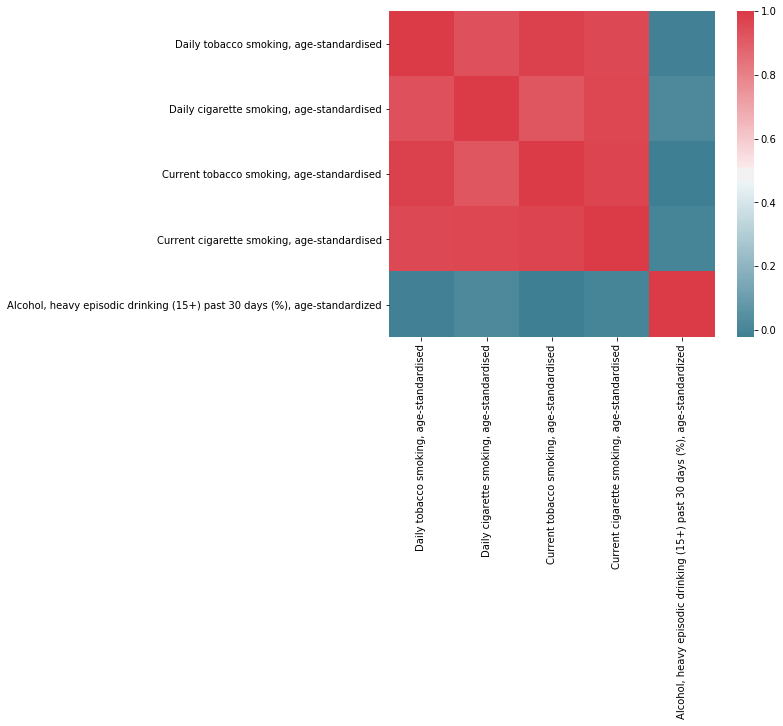

In [33]:
x = df_behrisk.iloc[:,1:6]
corr = x.corr()
print(corr.style.background_gradient(cmap='coolwarm').set_precision(2))

f, ax = pl.subplots(figsize=(8, 6))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [34]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,"Daily tobacco smoking, age-standardised","Daily cigarette smoking, age-standardised","Current tobacco smoking, age-standardised","Current cigarette smoking, age-standardised","Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized"
"Daily tobacco smoking, age-standardised",1,0.93,0.98,0.96,-0.012
"Daily cigarette smoking, age-standardised",0.93,1,0.92,0.96,0.018
"Current tobacco smoking, age-standardised",0.98,0.92,1,0.97,-0.022
"Current cigarette smoking, age-standardised",0.96,0.96,0.97,1,-0.00051
"Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized",-0.012,0.018,-0.022,-0.00051,1


#### NCD Risk Factor

In [35]:
df_perc=df[(df['Year']==2017) & (df['Risk Factor']=='NCD Prevalence Rate')]

In [36]:
## remove duplicates of Congo

df_perc[(df_perc['Indicator']=='Asthma prevalence rate')&( df_perc['Country']=='Congo')]
df_perc.drop([6367], inplace=True)


df_perc[df_perc['Indicator']=='Chronic obstructive pulmonary disease prevalence rate']['Country'].nunique()
df_perc.drop([6563], inplace=True)

df_perc[df_perc['Indicator']=='Chronic respiratory diseases prevalence rate']['Country'].nunique()
df_perc.drop([6758], inplace=True)

df_perc[df_perc['Indicator']=='Pneumoconiosis prevalence rate']['Country'].nunique()
df_perc.drop([7165], inplace=True)



/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is 

In [37]:
#exclude pne 
print('all 0 for the indicator: "Other chronic respiratory diseases prevalence rate" so will drop this indicator as no info is there')
df_perc[df_perc['Indicator']=='Other chronic respiratory diseases prevalence rate']
dropi = df_perc[df_perc['Indicator']=='Other chronic respiratory diseases prevalence rate'].index #all 0's
df_perc.drop(dropi, inplace=True)

all 0 for the indicator: "Other chronic respiratory diseases prevalence rate" so will drop this indicator as no info is there


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [39]:
df_ncd=pd.DataFrame()
irange = df_perc['Indicator'].unique()
df_perc.sort_values(['Indicator', 'Country'], ascending=True, inplace = True)

for i in irange:

    pivot = df_perc[df_perc['Indicator']==i].pivot(index='Country', columns='Indicator', values='Data')
    pivot.reset_index(inplace=True)
    pivot.columns =['Country', i]
    df_ncd['Country']=pivot['Country']
    df_ncd [i] = pivot[i]
    


df_ncd.head()

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Country,Asthma prevalence rate,Chronic obstructive pulmonary disease prevalence rate,Chronic respiratory diseases prevalence rate,Pneumoconiosis prevalence rate
0,Afghanistan,5520.271311,2469.099987,7642.147073,2.058286
1,Albania,2997.681117,6006.422879,8591.616027,10.350787
2,Algeria,5538.954664,3244.627805,8362.724221,3.654775
3,American Samoa,10523.876750,3124.340929,12777.207680,6.501375
4,Andorra,6255.701893,5819.334315,11420.807580,0.227133


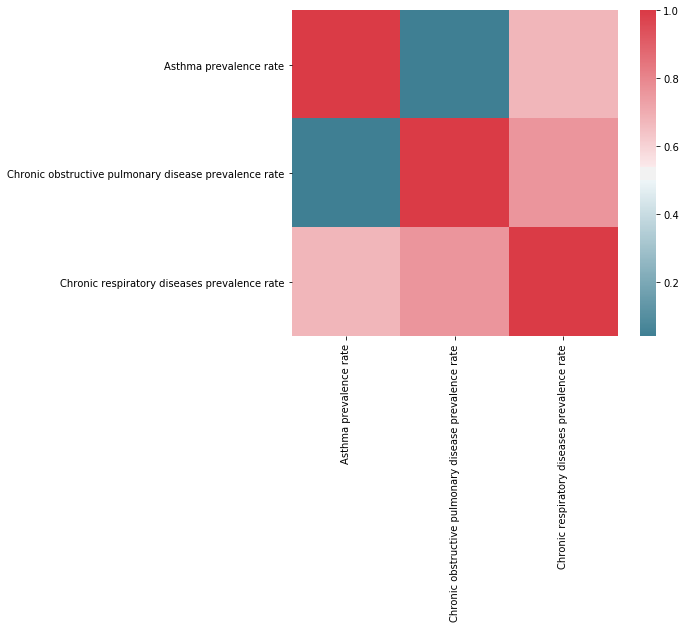

In [40]:
x =  df_ncd.iloc[:,1:4]
x.head()
import matplotlib.pyplot as pl
import seaborn as sns
import numpy as np

corr = x.corr()
print(corr.style.background_gradient(cmap='coolwarm').set_precision(2))

f, ax = pl.subplots(figsize=(8, 6))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [41]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Asthma prevalence rate,Chronic obstructive pulmonary disease prevalence rate,Chronic respiratory diseases prevalence rate
Asthma prevalence rate,1,0.041,0.68
Chronic obstructive pulmonary disease prevalence rate,0.041,1,0.76
Chronic respiratory diseases prevalence rate,0.68,0.76,1


### Explore Missing countries and data points

In [42]:
a = df[(df['Indicator']=='Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)')  & ( df['Year']==2016)
      ]#    190


b = df[(df['Indicator']=='Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)')          & (df['Year'] ==2016)]


c = df[(df['Indicator']=='Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years'  )                 & (df['Year'] ==2015 ) ]

d = df[(df['Indicator'] == 'Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years') & (df['Year']==2014 ) 
      ]
e=a

In [43]:
#e = df[(df['Indicator']=='Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized' )     & ( df['Year']==2016)  ]  
#e = df[(df['Indicator']== 'Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)' )    & ( df['Year']==2016) ]         
#e = df[(df['Indicator']== 'Current cigarette smoking, age-standardised')  & ( df['Year']==2013)   ]
#e = df[(df['Indicator']==  'Current tobacco smoking, age-standardised')     & ( df['Year']==2013)]                                             
#e = df[(df['Indicator']==  'Daily cigarette smoking, age-standardised')       & ( df['Year']==2013)  ]  

e = df[(df['Indicator']==  'Daily tobacco smoking, age-standardised')       & ( df['Year']==2013)  ]   


#e = df[(df['Indicator']=='Concentrations of fine particulate matter (PM2.5)  ' )     & ( df['Year']==2016)  ]  
#e = df[(df['Indicator']=='Concentrations of fine particulate matter (PM2.5)  ' )     & ( df['Year']==2020)  ]  

In [44]:
set_country = e['Country'].unique()
set_country =  pd.DataFrame(set_country,columns=['Country'])
complete_country =df[(df['Year']==2017) & (df['Risk Factor']=='NCD Prevalence Rate')]['Country'].unique()
complete_country=pd.DataFrame(complete_country,columns=['Country'])

m = complete_country[~complete_country['Country'].isin(set_country['Country'])]
#Behavioral Risk Factor 

## Assigning Risk Factor Scores using Percentage Binning

### NCD Risk Factor

In [45]:
c = df_ncd.iloc[:,0]
df_ncd = df_ncd.iloc[:,1:4]

In [46]:
qt = df_ncd.quantile([.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9,1])
qt

,Asthma prevalence rate,Chronic obstructive pulmonary disease prevalence rate,Chronic respiratory diseases prevalence rate
0.1,3126.645501,1492.849325,4901.256075
0.2,3408.827396,1841.480321,5734.883690
0.3,3797.558609,2205.271818,6352.331379
0.4,4172.810457,2689.453156,7095.647589
0.5,4624.548553,3037.251289,7895.822310
0.6,5061.977852,3409.192267,8737.381272
0.7,5427.108594,4210.077151,9704.144244
0.8,6410.425313,5841.020325,11256.259790
0.9,7520.879333,6478.024228,12322.973105
1.0,12095.018780,10643.456040,15356.234020


In [47]:
perc=pd.DataFrame()
l = df_ncd.shape[0]

for i in range(0,3):
    binn = []
    for j in range(0,l ):
        for q in range (0,10):
            if df_ncd.iloc[j,i]<=qt.iloc[q,i]:
                binn.append(q+1)
                break
    perc[i] = binn
perc.columns = df_ncd.columns
perc['Country']=c
            

In [48]:
perc.head(10)

,Asthma prevalence rate,Chronic obstructive pulmonary disease prevalence rate,Chronic respiratory diseases prevalence rate,Country
0,8,4,5,Afghanistan
1,1,9,6,Albania
2,8,6,6,Algeria
3,10,6,10,American Samoa
4,8,8,9,Andorra
5,7,1,4,Angola
6,9,4,6,Antigua and Barbuda
7,5,7,6,Argentina
8,3,8,6,Armenia
9,10,8,10,Australia


### Metabolic Risk Factor

### Behavioral Risk Factor